In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [2]:
# Load dataset
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
# Zero padding
max_len = 100
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print(x_train.shape)
print(x_test.shape)

(25000, 100)
(25000, 100)


In [4]:
# One hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [5]:
# Initialize model
model = models.Sequential()
model.add(layers.Embedding(max_features, 64, input_length=max_len))
model.add(layers.SimpleRNN(32, return_sequences=True))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 32)           3104      
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 16)                51216     
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 694354 (2.65 MB)
Trainable params: 694354 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Fit the model
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 11s 58ms/step - loss: 0.5210 - acc: 0.7225 - val_loss: 0.3736 - val_acc: 0.8340
Epoch 2/10
157/157 [==============================] - 7s 45ms/step - loss: 0.2925 - acc: 0.8815 - val_loss: 0.4223 - val_acc: 0.8110
Epoch 3/10
157/157 [==============================] - 8s 50ms/step - loss: 0.1493 - acc: 0.9474 - val_loss: 0.4631 - val_acc: 0.8290
Epoch 4/10
157/157 [==============================] - 8s 52ms/step - loss: 0.0512 - acc: 0.9854 - val_loss: 0.6729 - val_acc: 0.8112
Epoch 5/10
157/157 [==============================] - 7s 44ms/step - loss: 0.0206 - acc: 0.9946 - val_loss: 0.7163 - val_acc: 0.8114
Epoch 6/10
157/157 [==============================] - 8s 52ms/step - loss: 0.0096 - acc: 0.9977 - val_loss: 0.9345 - val_acc: 0.7910
Epoch 7/10
157/157 [==============================] - 8s 49ms/step - loss: 0.0049 - acc: 0.9987 - val_loss: 1.1102 - val_acc: 0.7780
Epoch 8/10
157/157 [==============================] - 10s 62ms/step 

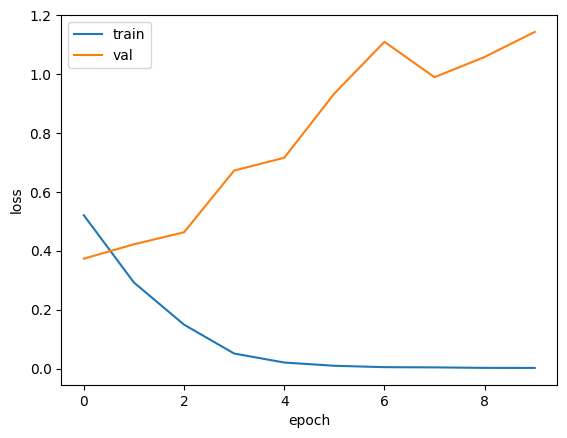

In [7]:
# Visualize the loss in fitting process
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

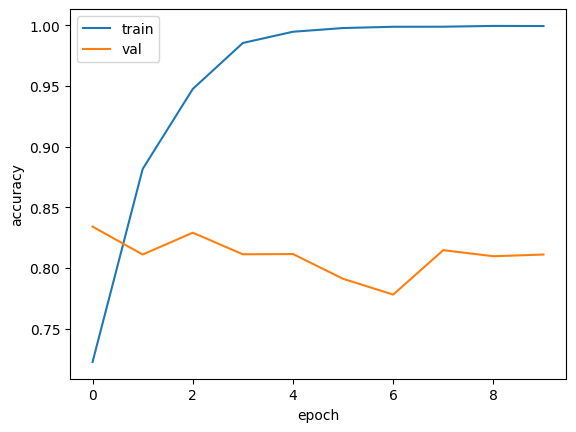

In [8]:
# Visualize the accuracy in fitting process
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('Test Accuracy:', test_acc)

782/782 [==============================] - 7s 9ms/step - loss: 1.1673 - acc: 0.8070
Test Accuracy: 0.8070399761199951
